In [1]:
%load_ext autoreload
%autoreload 2
from helpers import *
from NLP import *
from SentenceSplitterML import *
from TokenizerML import *
from lexicons import *
import nltk as nltk
from Parser import *
import daft
import matplotlib.pyplot as plt
import networkx as nx

Loading and tokenizing sentences

In [ ]:
name = 'p2_data1'
text = get_text(name)
tokenizer = NLP(text)
tokenizer.sentence_split()
sentences = tokenizer.sentences
for sentence in sentences:
    t = NLP(sentence)
    t.tokenize()
    tokens = t.dirty_tokens
    print(nltk.pos_tag(tokens[0:-1]))

In [ ]:
nltk.download()

In [ ]:
text = nltk.tokenize.word_tokenize("Book our flight")
tag = nltk.pos_tag(text)
print(tag)

In [3]:
text = "I bought a red gift for my friend yesterday"
p = Parser(text)
print(p.parsed_text)
print(p.get_all_tags(2))
table, links = p.parse()
#print(table)
for tab in table:
    print(tab)
print(links)
#print(p.check_possible_pairs(["NP", "Det"], ["VP", "Nominal", "g"]))

[('I', 'PRP'), ('bought', 'VBD'), ('a', 'DT'), ('red', 'JJ'), ('gift', 'NN'), ('for', 'IN'), ('my', 'PRP$'), ('friend', 'NN'), ('yesterday', 'NN')]
['Det']
[['S', 'Pronoun', 'NP'], ['S'], [], ['S'], [], [], ['S'], ['S'], ['S']]
[['Verb', 'VP'], [], ['VP'], [], [], ['VP'], ['VP'], ['VP']]
[['Det'], ['NP'], [], [], ['NP'], ['NP'], ['NP']]
[['Adjective'], ['NP'], [], ['Nominal'], ['Nominal'], ['Nominal']]
[['Noun', 'Nominal', 'NP'], [], ['Nominal'], ['Nominal'], ['Nominal']]
[['Preposition'], ['PP'], ['PP'], ['PP']]
[['Pronoun', 'NP'], ['NP'], ['NP']]
[['Noun', 'Nominal', 'NP'], ['Nominal']]
[['Noun', 'Nominal', 'NP']]
[['S', ['NP', 'VP']], ['VP', ['Verb', 'NP']], ['NP', ['Det', 'Nominal']], ['Nominal', ['Adjective', 'Nominal']], ['Nominal', ['Nominal', 'PP']], ['PP', ['Preposition', 'NP']], ['NP', ['Pronoun', 'Nominal']], ['Nominal', ['Nominal', 'Noun']]]


In [ ]:
G = nx.Graph()
for i in range(len(links)):
    if i == 0:
        G.add_node(links[i][0], label="Dinno", )
        G.add_edges_from([(links[i][0], links[i][1][0]), (links[i][0], links[i][1][1])])
    else:
        G.add_edges_from([(links[i][0], links[i][1][0]), (links[i][0], links[i][1][1])])
nx.draw(G, with_labels = True)


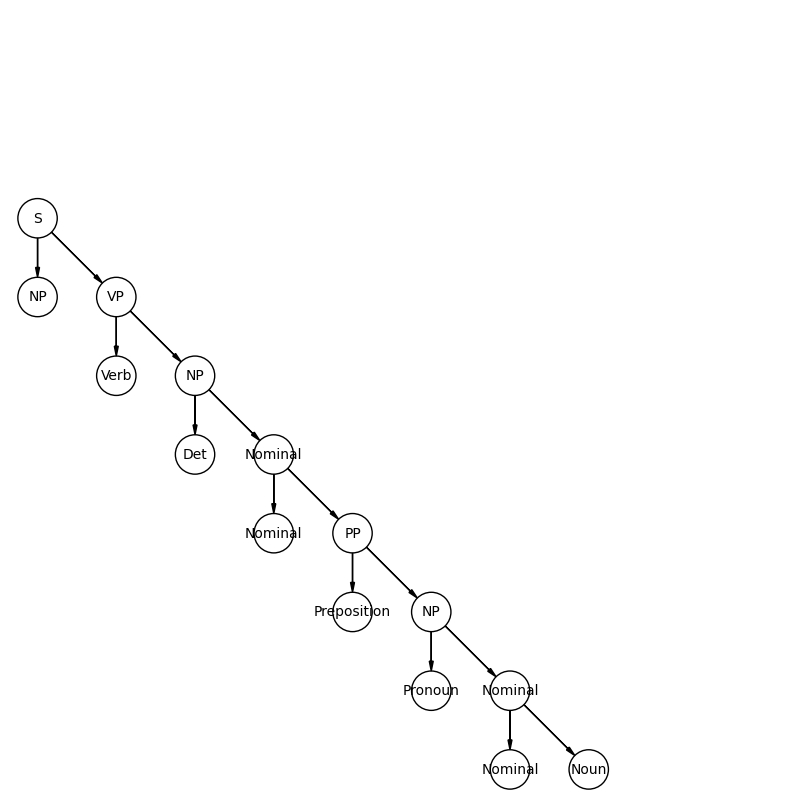

In [34]:
L = 10
H = 10
pgm = daft.PGM(shape=[L, H])

y = H
x = L/2
pgm.add_node(daft.Node('0', links[0][0], L/2, H))
for i in range(len(links)):
    y = y - 1
    for j in range(len(links[i])):
        pgm.add_node(daft.Node(str(i)+'_'+str(j), links[i][1][j], x+j+i, y))
        if i == 0:
            pgm.add_edge('0', str(i)+'_'+str(j))
        else:
            pgm.add_edge(str(i-1)+'_'+str(1), str(i)+'_'+str(j))

pgm.render()
plt.show()